In [2]:
from IPython.core.display import HTML
from IPython.lib.display import YouTubeVideo
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Data visualization

Visualizing your data is a **key** component of data analysis, no matter how big or small your data is.  Our minds are hardwired to process visual information, in fact **one-third** of our brain is dedicated to image processing and **40% of all** nerve fibers connected to the brain come from the retina. Visualization is essentially a high-speed link to your cognitive systems.

Let me show you a quick example.

## Traffic accidents

Let's look at this image together, it plots the number of accidents per month against the time of day. Then tell me when accidents are likely to occur?

<img src='../images/visualization_raw_chart.png'></img>

Now let's try something different. This is the same chart, but now I've added a color scale. The individual numbers have a deeper shade of blue the more accidents that occur during that time period.

Now tell me, when are accidents most likely to occur? How long did it take you to figure it out?

<img src = '../images/visualization_heatmap.png'></img>

# Effective visualizations make a difference

Effective visualizations allow us to make accurate decisions quicker. More importantly they help us make **correct** decisions. When you make a visualization, you're actually trying to make a point. The entire point is to persuade your audience of some fact that you know to be true. 

Whether you accept this statement or not, it is what happens. If you don't construct your visualization in a way that informs your audience and allows them to make a correct decision they can easily reach a different conclusion. 

# Creating a poor visualization can be disastrous

Literally, disastrous. 

Does everyone remember the 1986 Challenger shuttle launch? The Challenger was a NASA Space Shuttle that exploded upon take-off because the O-rings in the rockets cracked and allowed jet fuel to leak into the combustion chamber.

In [5]:
#Fast-forward to 7:10
YouTubeVideo('lQMuRbCaZ7E?t=7m10s')

## Why did the O-rings crack?

There were rumblings at NASA prior to the Challenger launch that defects in the O-rings occurred at cold temperatures. This data was looked at by a large number of people, but this is how it was presented to senior management (the people actually tasked with making the decision of **whether it was safe or not** to launch the rocket).

### When Challenger was launched the predicted temperature was 27 F.
### Would you have not launched the shuttle based on this graph?

<img src = '../images/challenger_original.png'></img>

Here is that graph remade.

### Now would you have not launched the shuttle?

<img src='../images/challenger_remade.png'></img>

# In NO way does this mean that you should lie with a graph

Yes, your purpose is persuade. But that doesn't mean that you should be like Fox News

<img src = '../images/fox_news.png'></img>

Or any other major cable news network for that matter (they are all awful). The real start of a final graph is identifying the key point that you want to communicate and then figuring out what is the best way to communicate that.

**Making a good graph is just like writing a good essay in that regard** (and here you thought that we would never invoke English composition in a programming class). 

From here on we will focus on the actual nuts and bolts of crafting a graph in Python, but you should keep these principles in mind. If you are interested more on the concepts and best practices of visualization you should read the books by [Edward Tufte](http://www.amazon.com/s/ref=nb_sb_noss_2?url=search-alias%3Daps&field-keywords=edward+tufte&rh=i%3Aaps%2Ck%3Aedward+tufte), he is considered to be one of the leading experts in this field. If you are looking for practical ways to create interactive visualizations on the web, it is my personal belief that you should look at the works of [Mike Bostock](http://bost.ocks.org/mike/) and [Scott Murray](http://alignedleft.com) that use [D3](http://d3js.org).

# Plotting in Python

A number of plotting packages have emerged for Python in the last 3 years. However, the largest, most complete package is `matplotlib`. `Matplotlib` was created in 2003 and is the oldest Python plotting library that has survived.

However, that doesn't mean that it's always the best. If you are a biologist there is the `seaborn` library and if you don't care about your data being public there is a new service called `plot.ly` with a Python library.

In any case, `matplotlib` covers the majority of situations to create graphs that users in the class will need. There are also the most stackoverflow answers for the library (which are honestly the actual documentation for it. Don't ever bother going to the actual matplotlib web page for a question), which help new users utilize its features. For these reasons we will cover it in the class.

## Matplotlib has every option you need
### And in most cases too many options

If you go poking around on-line you'll read about how `matplotlib` has both a `matlab` style plotting interface to convert engineers and an `object-oriented` interface. **Ignore all of that noise**. What it really means is that we can plot a graph very quickly with `matplotlib`. Let me show you.

In [16]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

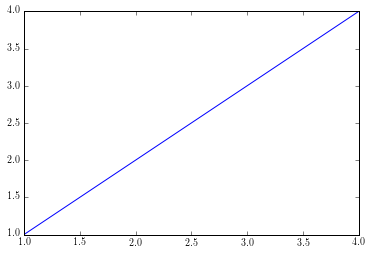

In [10]:
plt.plot([1, 2, 3, 4], [1, 2, 3, 4])

**There! That's a plot.**

This is that simple, instructive interface that they talk about online when they mention a `matlab` like interface.

However, creating a plot like this limits our ability to modify it. In our examples we will use the more `object-oriented` interface. It may seem like it has a lot of cruft, but it greatly expands our power in tweaking the visualization.

To create a graph this way we first create a `figure`

In [11]:
fig = plt.figure()

We can actually pass arguments to the figure, like changing its size.

In [17]:
fig = plt.figure(figsize = (10, 7))

Those dimensions are actually in inches, the first one is the width and the other is the height.

Now we have to create something to plot, that something is a set of `axes` inside a `subplot`. `subplot`s let us have multiple graphs inside a single plot. I'll show you it first though.

In [18]:
ax = fig.add_subplot(1, 1, 1)

And then plot it (I'm putting all of the commands together here)

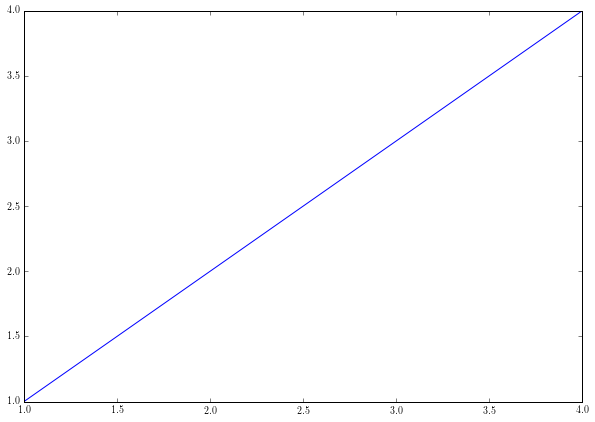

In [23]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.plot([1, 2, 3, 4], [1, 2, 3, 4])

When we specify subplots the first number is the number of rows of plots. The second number is the number of columns of plots. The third number is the specific plot that you wish to populate. This number goes from 1 to the maximum plot number (num_columns * num_rows). Hopefully this image will make it more clear

<img src='../images/matplotlib_subplots.png'></img>

And now let me demonstrate it

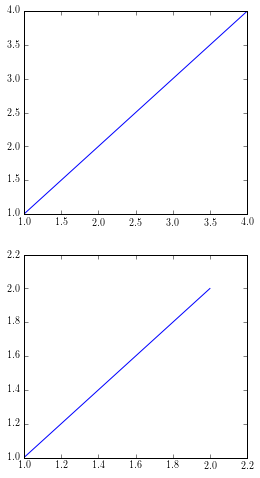

In [29]:
data = [1, 2, 3, 4]
#STart the figure
fig = plt.figure(figsize = (4, 8))
#Create the first axis
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(data, data)
#Create the second axis
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(data[:2], data[:2])

Now let's just import a host of libraries that we will use throughout this exercise.

In [30]:
import sys
import numpy as np
import random as rand 
import matplotlib as mpl
import matplotlib.cm as cm

And here I will create some fake data that I will use throughout to show some basic plots

In [31]:
x = range(5,100,5)
y = [i**2 for i in x]
z = [100*i for i in x]
rv1 = [rand.random() for i in range(1000)]
rv2 = [rand.random() for i in range(10000)]

Now plot the `x` and `y` data as a simple graph like I've already shown you.

In [33]:
#Here, let me create the figure for you
fig = plt.figure( figsize = (6, 4) )



An import part of graphing is labelling axes and providing legends?  IT's actually pretty simple. 

Let's add a little bit to our simple graph.

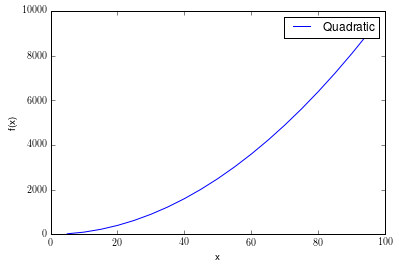

In [34]:
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic")
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
# Display legend
ax.legend()

#### Ok, that's the basics. But how do we make it visually appealing?

For that we'll need to start playing with the options. Let's start by changing the font size for the labels and the color of the plot.

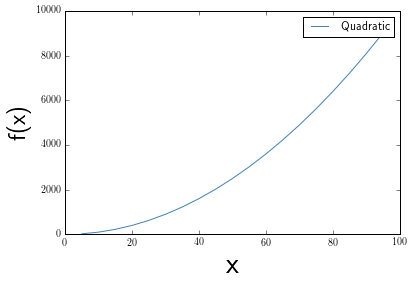

In [49]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue')
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("x", fontsize = 2*font_size, **helvetica_font)
ax.set_ylabel("f(x)", fontsize = 1.6*font_size, **helvetica_font)
# Display legend
ax.legend()

Or rather simply use LaTeX (if you know what it is) to write text.

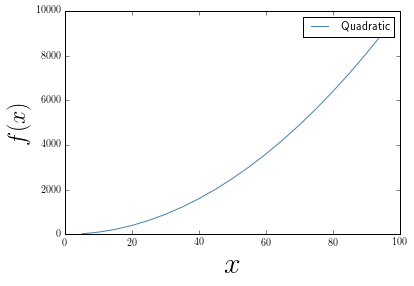

In [52]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue')
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("$x$", fontsize = 2*font_size, **helvetica_font)
ax.set_ylabel("$f(x)$", fontsize = 1.6*font_size, **helvetica_font)
# Display legend
ax.legend()

And we should really move the legend box, it's blocking the line! And get rid of that silly legend box.

Let's make the line **wider** too.

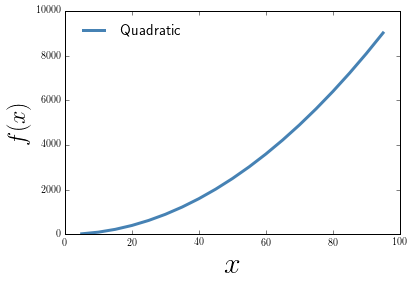

In [61]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue', linewidth = 3)
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("$x$", fontsize = 2*font_size, **helvetica_font)
ax.set_ylabel("$f(x)$", fontsize = 1.6*font_size, **helvetica_font)
# Display legend
ax.legend(loc='best', frameon=False, fontsize = font_size)

If this was real data, we would maybe want to show the individual datapoints too. To put points on the line we need to add a marker. 

Matplotlib has a number of different marker styles, but I'll just use a circle since that is the most common.

We should also add some text, let says that this is `Figure (A)` of a multi-part figure. We'll add `(A)` to teh plot.

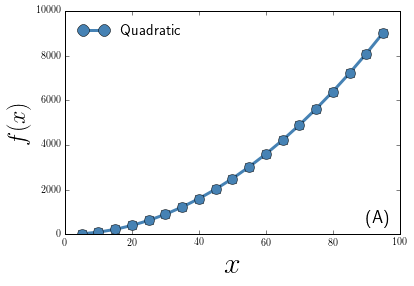

In [86]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue', linewidth = 3, marker = 'o', markersize = 10)
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("$x$", fontsize = 2*font_size, **helvetica_font)
ax.set_ylabel("$f(x)$", fontsize = 1.6*font_size, **helvetica_font)
# Display legend
ax.legend(loc='best', frameon=False, fontsize = font_size, markerscale = 1.2)
#Adding a label
ax.text(90, 500, "(A)", fontsize = 1.2 * font_size)

For a plot like this, we might also not want to have the full frame around the plot. We can remove that by changing the spines

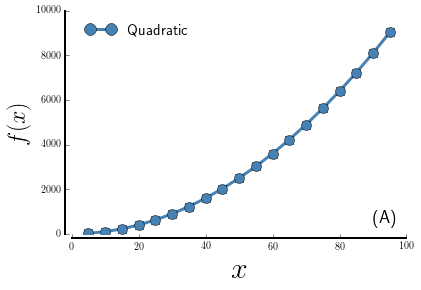

In [89]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue', linewidth = 3, marker = 'o', markersize = 10)
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("$x$", fontsize = 2*font_size, **helvetica_font)
ax.set_ylabel("$f(x)$", fontsize = 1.6*font_size, **helvetica_font)
# Display legend
ax.legend(loc='best', frameon=False, fontsize = font_size, markerscale = 1.2)
#Adding a label
ax.text(90, 500, "(A)", fontsize = 1.2 * font_size)
#Turn off the spines
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_position(("axes", -0.02))
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
#We'll also need to turn off the ticks on the axes that we turned off
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

But you know what's really bugging me now? The y-axis covers a great range, so much that it should be a log instead of linear scale

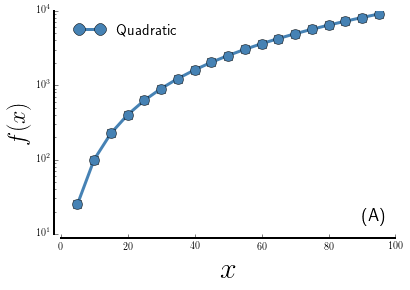

In [95]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue', linewidth = 3, marker = 'o', markersize = 10)
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("$x$", fontsize = 2*font_size, **helvetica_font)
ax.set_ylabel("$f(x)$", fontsize = 1.6*font_size, **helvetica_font)
# Display legend
ax.legend(loc='best', frameon=False, fontsize = font_size, markerscale = 1.2)
#Adding a label
ax.text(90, 15, "(A)", fontsize = 1.2 * font_size)
#Turn off the spines
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_position(("axes", -0.02))
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
#We'll also need to turn off the ticks on the axes that we turned off
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#Change the y-scale to log
ax.set_yscale('log')

And of course we can save the figure. To do that we use the `plt` command and just say `savefig()`. The file extension that we give in the filename determines the type of image file. You can choose to save the image as a `jpg`, `png`, `eps`, or `pdf`.

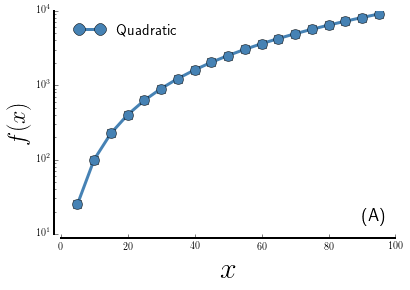

In [96]:
# Change the baseline font
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
#Create the figure
fig = plt.figure( figsize = (6, 4) )
ax = fig.add_subplot(1,1,1)
# We should add a label to our dataset that will go into a legend
ax.plot(x, y, label = "Quadratic", color = 'steelblue', linewidth = 3, marker = 'o', markersize = 10)
# Now we can label the axes. Always label your axes! Who knows what is in the graph otherwise
font_size = 15
ax.set_xlabel("$x$", fontsize = 2*font_size, **helvetica_font)
ax.set_ylabel("$f(x)$", fontsize = 1.6*font_size, **helvetica_font)
# Display legend
ax.legend(loc='best', frameon=False, fontsize = font_size, markerscale = 1.2)
#Adding a label
ax.text(90, 15, "(A)", fontsize = 1.2 * font_size)
#Turn off the spines
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_position(("axes", -0.02))
for axis in ['top','right']:
    ax.spines[axis].set_visible(False)
#We'll also need to turn off the ticks on the axes that we turned off
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#Change the y-scale to log
ax.set_yscale('log')
#Save the figure
plt.savefig('quadratic_logscale_half_frame.png')

# Now for all of these other plot types

There is far more than just a line plot in matplotlib. We can make a `scatter`, `bar`, `histogram`, `box plots`, and `violin plots`. 

You can see some simple examples of all of these types at the Matplotlib lib [page](http://matplotlib.org/gallery.html).

Here we'll just show you how to plot a histogram.

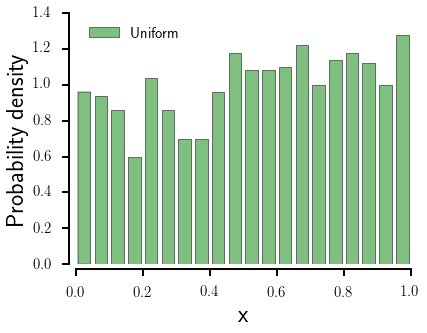

In [98]:
fig = plt.figure( figsize = (6, 4.5) )
sub1 = fig.add_subplot(1,1,1)

# Set baseline font size
font_size = 15

# Format graph frame and tick marks
sub1.yaxis.set_ticks_position('left')
sub1.xaxis.set_ticks_position('bottom')
sub1.tick_params(axis = 'both', which = 'major', length = 7, width = 2, direction = 'out', 
                 pad = 10, labelsize = font_size)
sub1.tick_params(axis = 'both', which = 'minor', length = 5, width = 2, direction = 'out', 
                 labelsize = 0.6 * font_size)
for axis in ['bottom','left']:
    sub1.spines[axis].set_linewidth(2)
    sub1.spines[axis].set_position(("axes", -0.02))
for axis in ['top','right']:
    sub1.spines[axis].set_visible(False)

# Calculate and plot histogram
n, bins, patches = sub1.hist(rv1, 20, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar",
                             label = "Uniform", cumulative = False)

# Format axes 
sub1.set_xlabel("x", fontsize = 1.6 * font_size)
sub1.set_ylabel("Probability density", fontsize = 1.6 * font_size)

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = font_size)

And now two histograms!

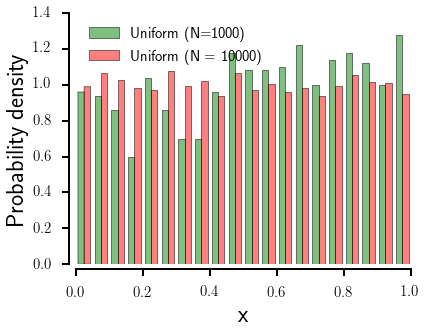

In [100]:
fig = plt.figure( figsize = (6, 4.5) )
sub1 = fig.add_subplot(1,1,1)

# Set baseline font size
font_size = 15

# Format graph frame and tick marks
sub1.yaxis.set_ticks_position('left')
sub1.xaxis.set_ticks_position('bottom')
sub1.tick_params(axis = 'both', which = 'major', length = 7, width = 2, direction = 'out', 
                 pad = 10, labelsize = font_size)
sub1.tick_params(axis = 'both', which = 'minor', length = 5, width = 2, direction = 'out', 
                 labelsize = 0.6 * font_size)
for axis in ['bottom','left']:
    sub1.spines[axis].set_linewidth(2)
    sub1.spines[axis].set_position(("axes", -0.02))
for axis in ['top','right']:
    sub1.spines[axis].set_visible(False)

# Calculate and plot histogram
n1, bins1, patches1 = sub1.hist([rv1, rv2], 20, normed = 1, rwidth = 0.75, color = ["g", "r"], alpha = 0.5, 
                                label = ["Uniform (N=1000)", "Uniform (N = 10000)"], cumulative = False)

# Format axes 
sub1.set_xlabel("x", fontsize = 1.6 * font_size)
sub1.set_ylabel("Probability density", fontsize = 1.6 * font_size)

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = font_size)